## Complete Text Processing 

### General Feature Extraction

- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts



### Preprocessing and Cleaning

- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt Sentiment Classifier



In [4]:
import pandas as pd
import numpy as np
import spacy

In [5]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-data/master/twitter4000.csv', encoding = 'latin1')

In [7]:
df.head()

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0


In [6]:
df['sentiment'].value_counts()

0    2000
1    2000
Name: sentiment, dtype: int64

## Word Counts

In [76]:
len('this is text'.split())

3

In [9]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [0]:
df.sample(5)

In [10]:
df['word_counts'].max()

32

In [11]:
df['word_counts'].min()

1

In [10]:
df[df['word_counts']==3]

,twitts,sentiment,word_counts
9,Food poisoning blowssss,0,3
12,can't fall asleep,0,3
187,Need some help,0,3
190,im veryy bad,0,3
210,@RichieSosa Me too,0,3
...,...,...,...
3964,Ahhhhhh aldo outlet!!!,1,3
3969,Just got twitter..,1,3
3971,@RainbowSoulPoet Thank you,1,3
3977,Five minutes.....and counting....,1,3


# Characters Count

In [11]:
len('this is')

7

In [12]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [13]:
char_counts('this is')

6

In [14]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [19]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
661,is wondering why when David finally comes to E...,0,19,83
3110,"@sugarbritchesyo he did, he got 3 wisdom teeth...",1,16,81
3687,Pool side! Feels like old times,1,6,26
1276,@icaruswingz The cunt.,0,3,20
78,has used more moisturer today than all the oth...,0,17,93


## Average Word Length

In [20]:
x = 'this is' # 6/2 = 3
y = 'thankyou guys' # 12/2 = 6

In [21]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [0]:
df.sample(4)

## Stop Words Count 

In [0]:
print(stopwords)

In [22]:
len(stopwords)

326

In [23]:
x = 'this is the text data'

In [0]:
x.split()

In [0]:
[t for t in x.split() if t in stopwords]

In [0]:
len([t for t in x.split() if t in stopwords])

In [0]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [0]:
df.sample(5)

## Count #HashTags and @Mentions 

In [0]:
x = 'this is #hashtag and this is @mention'

In [0]:
x.split()

In [0]:
[t for t in x.split() if t.startswith('@')]

In [0]:
len([t for t in x.split() if t.startswith('@')])

In [0]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [0]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [0]:
df.sample(5)

## If numeric digits are present in twitts

In [24]:
x = 'this is 1 and 2'

In [25]:
x.split()

['this', 'is', '1', 'and', '2']

In [26]:
x.split()[3].isdigit()

False

In [27]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [28]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [74]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
102,im_queen on twitterberry i missed it whatchu d...,0,9,49,[],0,0
1648,man this weather makes me sleepy do not feel l...,0,11,57,[],0,0
977,arghhhhhhwanna my voice to be back,0,6,32,[],0,0
3535,kieft75 naomikievit have fun today 1500 fantas...,1,9,57,[],0,0
1341,leylacarter me gusta twittear dejameeeeeeeee,0,5,41,[],0,0


## UPPER case words count 

In [0]:
x = 'I AM HAPPY'
y = 'i am happy'

In [30]:
[t for t in x.split() if t.isupper()]

[]

In [31]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [0]:
df.sample(5)

In [0]:
df.iloc[3962]['twitts']

# Preprocessing and Cleaning

## Lower Case Conversion 

In [32]:
x = 'this is Text'

In [33]:
x.lower()

'this is text'

In [34]:
x = 45.0
str(x).lower()

'45.0'

In [15]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [16]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
1875,@shanedawson :l nice :/ i'd usually be laughin...,0,18,77
2245,http://bit.ly/olmuv i'll be driving on the aut...,1,19,108
3675,"make me warm or take home, it's so cold in her...",1,20,77
2333,gooood morning....i can't wait to get home,1,7,36
3177,@breezy4sheezy yeah we love ya,1,5,26


## Contraction to Expansion 

In [17]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [18]:
x = "i'm don't he'll" # "i am do not he will"

In [19]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [20]:
cont_to_exp(x)

'i am do not he will'

In [21]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

91.1 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
1226,@khal awww may she rest in peace.,0,7,27
2042,@shelleybackes ugh - crash test dummies drove ...,1,18,72
3849,@jaymeallover sry i missed your calls. i fell ...,1,23,114
165,woo i feel evil today god forgive me,0,8,29
496,studying for a final that is going to be the d...,0,13,46


## Count and Remove Emails 



In [23]:
import re

In [24]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51


In [25]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [26]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [27]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [28]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [29]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [30]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,[markbradbury_16@hotmail.com],1


In [52]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [31]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [32]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,[markbradbury_16@hotmail.com],1


## Count URLs and Remove it 



In [33]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [0]:
#shh://git@git.com:username/repo.git=riif?%

In [34]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [35]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [36]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
1128,http://twitpic.com/7oiqc - last day,0,4,32,[],0,1
1760,@blogrworld still need to be connected to the ...,0,20,112,[],0,1
605,my scratched halo 3 http://flic.kr/p/6yjrvo,0,5,39,[],0,1
1712,not to be too macabre but its hard to believe ...,0,22,113,[],0,1
2499,http://twitpic.com/69jrk - the boot screen of ...,1,16,86,[],0,1


In [0]:
x

In [0]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

In [37]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [38]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
183,photo: miss germany,0,4,44,[],0,1
2017,buy the song,1,4,29,[],0,1
3408,speed of sound - coldplay. good morning ã¢ââ«,1,9,60,[],0,1
1188,palm pre na officiãâ¡lnãâ­ch obrãâ¡zcãâ­ch...,0,16,121,[],0,1
2283,"@anjeee great flick, kickin remix ?",1,7,51,[],0,1


## Remove RT 

In [39]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,[],0,0
...,...,...,...,...,...,...,...
3913,for the press so after she recovered she kille...,1,24,100,[],0,0
3919,earned her cpr &amp; first aid certifications!,1,7,40,[],0,0
3945,"@teciav &quot;i look high, i look low, i look ...",1,23,106,[],0,0
3951,i am soo very parched. and hungry. oh and i am...,1,21,87,[],0,0


In [40]:
x = '[removed] @username: hello hirt'

In [41]:
re.sub(r'\bremoved\b', '', x).strip()

'[] @username: hello hirt'

In [42]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\bremoved\b', '', x).strip())

## Special Chars removal or punctuation removal 

In [43]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
3515,@gailporter my sis used to have hair that blon...,1,13,57,[],0,0
445,official ..185.5 lame i should have grinded,0,7,37,[],0,0
1464,i dont like the heat anymore im sooo tired &a...,0,13,57,[],0,0


In [77]:
x = 'abc. ... - + = [] {} /\ <> , . !@#$%^&*() _ | ` "" ; : ?'

In [79]:
print(re.sub(r'[^\w ]+', "", x))

abc            _      


In [46]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [47]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,emails,emails_count,url_flags
2369,adamandevewed thanks are you going to sprinkle...,1,8,53,[],0,0
1500,torhart i used my teef whiteners now my teeth ...,0,15,67,[],0,0
1215,on train home train full and lots of drunk me...,0,19,74,[],0,0
1874,going to go to sleep on an empty stomach,0,9,32,[],0,0
2518,louieaberia hahaha awww how nice thanks hehe ...,1,25,109,[],0,0


## Remove multiple spaces `"hi   hello    "`

In [48]:
x =  'hi    hello     how are you'

In [49]:
' '.join(x.split())

'hi hello how are you'

In [50]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

## Remove HTML tags

In [0]:
!pip install lxml

In [51]:
from bs4 import BeautifulSoup

In [52]:
x = '<html><h1> thanks for watching it </h1></html>'

In [79]:
x.replace('<html><h1>', '').replace('</h1></html>', '') #not rec

' thanks for watching it '

In [80]:
soup =  BeautifulSoup(x,  "html.parser")

In [53]:
BeautifulSoup(x, 'html.parser').get_text().strip()

'thanks for watching it'

In [85]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

CPU times: user 267 ms, sys: 1.22 ms, total: 269 ms
Wall time: 281 ms


## Remove Accented Chars 

In [54]:
x = 'Áccěntěd těxt'

In [55]:
import unicodedata

In [56]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [57]:
remove_accented_chars(x)

'Accented text'

In [58]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

## Remove Stop Words 

In [0]:
x = 'this is a stop words'

In [0]:
' '.join([t for t in x.split() if t not in stopwords])

In [0]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [0]:
df.sample(5)

## Convert into base or root form of word 

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
x = 'this is chocolates. what is times? this balls'

In [0]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [0]:
make_to_base(x)

In [0]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [0]:
df.sample(5)

## Common words removal 

In [91]:
x = 'this is this okay bye'

In [59]:
text = ' '.join(df['twitts'])

In [60]:
len(text)

280897

In [61]:
text = text.split()

In [62]:
len(text)

53482

In [63]:
freq_comm = pd.Series(text).value_counts()

In [64]:
f20 = freq_comm[:20]

In [65]:
f20

i       2392
to      1363
the     1299
a        957
is       877
my       825
you      822
it       735
and      733
not      599
in       571
for      521
of       482
am       472
that     435
me       432
on       427
have     419
so       373
at       320
dtype: int64

In [99]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [100]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,numerics_count,upper_counts,emails,emails_count,url_flags
3571,bobbythomas1 methinks get up earlier sorry mis...,1,20,90,4.500000,0,2,[],0,0
2431,dannygokey aww well least got some sleep liked...,1,22,92,4.181818,0,2,[],0,0
650,jovanh yep tweeting while driving too,0,6,34,5.666667,0,0,[],0,0
3780,ooh_its_allyson yeaa imaa record xd or jazmine...,1,22,85,3.863636,0,2,[],0,0
66,anthothemantho hahaha agree cried like baby wh...,0,16,71,4.437500,0,0,[],0,0


## Rare words removal 

In [68]:
rare20 = freq_comm.tail(100)

In [69]:
rare20

rooms                    1
italy                    1
majatutaja               1
sablevenus               1
swiss                    1
                        ..
concerttransportation    1
alritei                  1
sid88                    1
fiiiiinally              1
rerunlovin               1
Length: 100, dtype: int64

In [103]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [104]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,numerics_count,upper_counts,emails,emails_count,url_flags
3770,watching stardust love this movie,1,6,31,5.166667,0,0,[],0,0
1533,lovin her lululemon shortsmaybe should start g...,0,19,88,4.631579,0,2,[],0,0
2281,shame can hear parents talking about smirks an...,1,21,101,4.809524,0,0,[],0,0
3074,spending lot more time twitter after installin...,1,21,100,4.761905,0,1,[],0,0
2308,graceawong lmao if kitchen had been cool then ...,1,24,112,4.666667,0,2,[],0,0


## Word Cloud Visualization 

In [0]:
# !pip install wordcloud

In [105]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
text = ' '.join(df['twitts'])

In [107]:
len(text)

236970

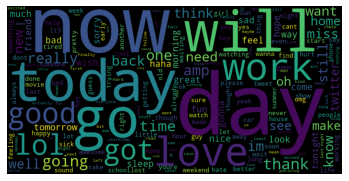

In [108]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction 

In [0]:
!pip install -U textblob

In [109]:
!python -m textblob.download_corpora

/usr/bin/python: No module named textblob


In [70]:
from textblob import TextBlob

In [71]:
x = 'thankks forr waching it'

In [72]:
x = TextBlob(x).correct()

In [73]:
str(x)

'thanks for watching it'

In [127]:
df['twitts']=df['twitts'].apply(lambda x:str(TextBlob(x).correct()))

KeyboardInterrupt: 

## Tokenization using TextBlob


In [115]:
x = 'thanks#watching this video. please like it'

In [116]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [117]:
doc = nlp(x)
for token in doc:
    print(token)

NameError: name 'nlp' is not defined

## Detecting Nouns 

In [0]:
x = 'Breaking News: Donal Trump, the president of the USA is looking to sign a deal to mine the moon'

In [0]:
doc = nlp(x)

In [0]:
for noun in doc.noun_chunks:
    print(noun)

## Language Translation and Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [119]:
x

'thanks#watching this video. please like it'

In [121]:
tb.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [122]:
tb.translate(to = 'zh')

AttributeError: 'list' object has no attribute 'strip'

## Use TextBlob's Inbuilt Sentiment Classifier 

In [0]:
from textblob.sentiments import NaiveBayesAnalyzer

In [0]:
x = 'we all stands together. we are gonna win this fight'

In [0]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [0]:
tb.sentiment